### SVM_Naive_Bayes_02

#### Disciplina Inteligência Artificial

#### Prof: José Humberto Cruvinel


In [13]:
# Carregando Bibliotecas Python
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
from sklearn import svm
%matplotlib inline 

In [14]:
# Importando o dataset 
from sklearn.datasets import load_breast_cancer
data = load_breast_cancer()

In [15]:
# Podemos também trabalhar com o Pandas
df = pd.DataFrame(data=data.data, columns=data.feature_names)
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [16]:
# Adicionando as colunas Target e Target_Name
df['Target'] = data.target
df['Target_Name'] = df.apply(lambda row: data.target_names[int(row.Target)], axis=1)
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,Target,Target_Name
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0,malignant
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0,malignant
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0,malignant
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0,malignant
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0,malignant


In [17]:
# Vamos separar as variáveis (X) do resultado (y)
X = df.iloc[:,:-2]
y = df['Target'].values

In [18]:
# Separação entre os dados de treino e teste
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split (X , y, test_size=0.2, random_state=50)
print('X_train:',X_train.shape)
print('y_train:',y_train.shape)
print('X_test:',X_test.shape)
print('y_test:',y_test.shape)

X_train: (455, 30)
y_train: (455,)
X_test: (114, 30)
y_test: (114,)


In [19]:
!pip install scikit-plot
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from scikitplot.metrics import plot_roc
# Criando funcao para imprimir resultados
def show_results(model, X_test, y_test):
  # Modelo 1
  y_pred = model.predict(X_test)
  print('Shape y_pred:',y_pred.shape)
  # Imprimindo o Score para os dados de teste
  print ("Accuracy is ", accuracy_score(y_test,y_pred)*100)
  # Medidas de desempenho
  print("Accuracy:",accuracy_score(y_pred,y_test))
  print("Precision:",precision_score(y_pred,y_test,average='weighted'))
  print("Recall:",recall_score(y_pred,y_test,average='weighted'))
  print("F1 Score:",f1_score(y_pred,y_test,average='weighted'))
  # Imprimindo a matriz de confusão
  plot_confusion_matrix(model, X_test, y_test)
  try:
    plt.show()
    # Plotando a curva ROC para os dados de teste
    y_probas = model.predict_proba(X_test)
    plot_roc(y_test, y_probas, figsize=(10, 8))   
    plt.show()
  except AttributeError:
    print('ROC indisponivel')

Shape y_pred: (114,)
Accuracy is  98.24561403508771
Accuracy: 0.9824561403508771
Precision: 0.9833558254610886
Recall: 0.9824561403508771
F1 Score: 0.9825715604801477


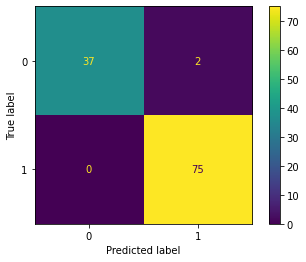

ROC indisponivel


In [20]:
# Criando 4 modelos diferentes de SVM (Suport Vector Machine)
svm_1 = svm.SVC(kernel='linear').fit(X_train, y_train)
show_results(svm_1, X_test, y_test)

Shape y_pred: (114,)
Accuracy is  91.22807017543859
Accuracy: 0.9122807017543859
Precision: 0.9128565002249213
Recall: 0.9122807017543859
F1 Score: 0.9113428408977675


/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


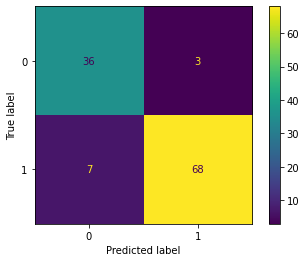

ROC indisponivel


In [21]:
svm_2 = svm.LinearSVC().fit(X_train, y_train)
show_results(svm_2, X_test, y_test)

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Shape y_pred: (114,)
Accuracy is  65.78947368421053
Accuracy: 0.6578947368421053
Precision: 1.0
Recall: 0.6578947368421053
F1 Score: 0.7936507936507937


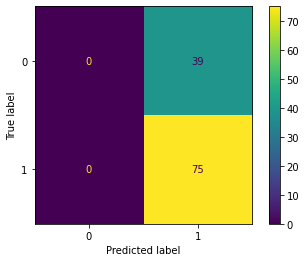

ROC indisponivel


In [22]:
svm_3 = svm.SVC(kernel='rbf', gamma=0.7).fit(X_train, y_train)
show_results(svm_3, X_test, y_test)

Shape y_pred: (114,)
Accuracy is  93.85964912280701
Accuracy: 0.9385964912280702
Precision: 0.9412685560053982
Recall: 0.9385964912280702
F1 Score: 0.9392225662194703


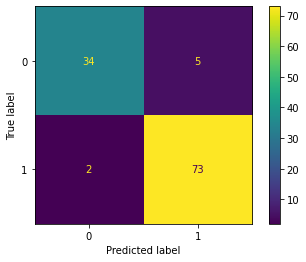

ROC indisponivel


In [23]:
svm_4 = svm.SVC(kernel='poly', degree=3).fit(X_train, y_train)
show_results(svm_4, X_test, y_test)

## Uso de Naive Bayes

Shape y_pred: (114,)
Accuracy is  96.49122807017544
Accuracy: 0.9649122807017544
Precision: 0.9649122807017544
Recall: 0.9649122807017544
F1 Score: 0.9649122807017544


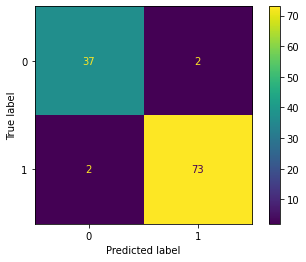

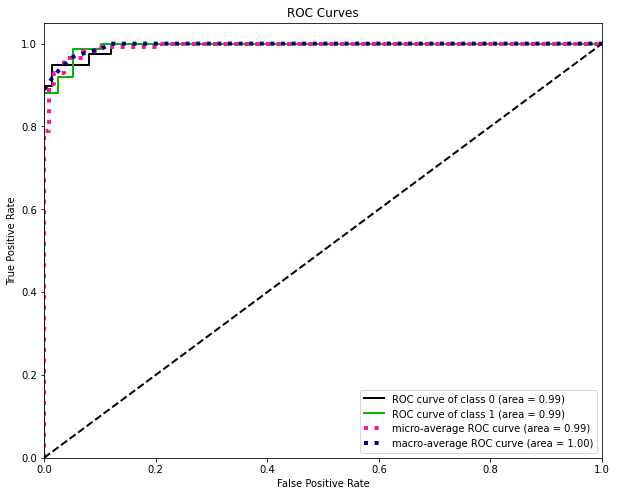

In [24]:
# Agora vamos comparar com Naive Bayes
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB().fit(X, y)
show_results(nb, X_test, y_test)